# Predict TripAdvisor Rating

### Итоговое задание по Проекту 3. О вкусной и здоровой пище (SF-DSTR-4)

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
7090,id_7090,Geneva,NaN,1386.0,NaN,9.0,"[[""Absolutely awful. Don't go."", 'Great place ...",/Restaurant_Review-g188057-d4290723-Reviews-Ca...,d4290723,0,0.0
37099,id_19,Budapest,"['European', 'Central European', 'Internationa...",20.0,$$$$,903.0,"[['Delicious', 'Food,staff-wow!'], ['01/03/201...",/Restaurant_Review-g274887-d1828955-Reviews-Co...,d1828955,1,4.5
33502,id_1824,Brussels,"['Chinese', 'Vietnamese']",1825.0,$,27.0,"[['First visit', 'Really good asian food'], ['...",/Restaurant_Review-g1136495-d7996890-Reviews-K...,d7996890,1,3.5
7648,id_7648,Warsaw,NaN,2154.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274856-d12506182-Reviews-P...,d12506182,0,0.0
19077,id_2475,Rome,"['Italian', 'Pizza', 'Mediterranean']",2476.0,$,18.0,"[[], []]",/Restaurant_Review-g187791-d12659713-Reviews-I...,d12659713,1,5.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [20]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
49074,id_2226,['French'],2227.0,$,76.0,"[['Good burgers, a busy restaurant at lunch t....",/Restaurant_Review-g207360-d8651263-Reviews-Ni...,d8651263,1,3.5,...,0,0,0,0,0,0,0,0,0,0
26291,id_584,NaN,585.0,NaN,23.0,"[['Brilliant visit', 'Theatre Edgy Bistro'], [...",/Restaurant_Review-g274856-d9756785-Reviews-Kw...,d9756785,1,4.5,...,0,0,0,0,0,0,0,1,0,0
11684,id_25,"['French', 'European', 'Vegetarian Friendly', ...",26.0,$$$$,623.0,"[['The epitome of fine dining in Vienna', 'Qua...",/Restaurant_Review-g190454-d1117910-Reviews-Le...,d1117910,1,4.5,...,0,0,0,0,0,0,1,0,0,0
12501,id_7059,NaN,7060.0,NaN,7.0,"[['Best Falafel in Paris', 'Great hole in the ...",/Restaurant_Review-g187147-d11713844-Reviews-T...,d11713844,1,4.5,...,0,0,1,0,0,0,0,0,0,0
30210,id_1922,"['American', 'Fast Food', 'Vegetarian Friendly']",1926.0,$,83.0,"[['Wow', 'Yummy.'], ['01/03/2018', '01/03/2018']]",/Restaurant_Review-g186338-d6642112-Reviews-Th...,d6642112,1,4.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [22]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [23]:
# Обработка 'Price Range' 

pr_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}

data = data.replace({"Price Range": pr_dict})

In [24]:
# Заполним пропуски в 'Price Range'

data['Price Range'].fillna(0, inplace=True)

In [25]:
data['Price Range'].value_counts()

2.0    23041
0.0    17361
1.0     7816
3.0     1782
Name: Price Range, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### *Обработать другие признаков:*

### Cuisine Style

In [26]:
# создание списка из кухонь и определение наиболее часто встречающихся

import collections

cuisine_list = []

for i in data['Cuisine Style']:
    if str(i) != "nan":
        cuisine = str(i[1:-1]).split(', ')
        for j in cuisine:
            cuisine_list.append(j[1:-1])

In [27]:
# просмотр кохонь по количеству их упоминания в сете в порядке убывания

cuisine_counter = collections.Counter()
for g in cuisine_list:
    cuisine_counter[g] += 1
    
cuisine_counter.most_common()

[('Vegetarian Friendly', 14021),
 ('European', 12561),
 ('Mediterranean', 7820),
 ('Italian', 7433),
 ('Vegan Options', 5684),
 ('Gluten Free Options', 5185),
 ('Bar', 4094),
 ('French', 3970),
 ('Asian', 3786),
 ('Pizza', 3502),
 ('Spanish', 3456),
 ('Pub', 3058),
 ('Cafe', 2883),
 ('Fast Food', 2122),
 ('British', 1992),
 ('International', 1966),
 ('Seafood', 1878),
 ('Japanese', 1860),
 ('Central European', 1727),
 ('American', 1642),
 ('Sushi', 1450),
 ('Chinese', 1446),
 ('Portuguese', 1385),
 ('Indian', 1328),
 ('Middle Eastern', 980),
 ('Thai', 923),
 ('Wine Bar', 877),
 ('German', 820),
 ('Halal', 773),
 ('Greek', 768),
 ('Healthy', 758),
 ('Fusion', 748),
 ('Czech', 745),
 ('Steakhouse', 729),
 ('Barbecue', 710),
 ('Contemporary', 652),
 ('Soups', 630),
 ('Eastern European', 629),
 ('Vietnamese', 622),
 ('Grill', 617),
 ('Gastropub', 608),
 ('Turkish', 574),
 ('Mexican', 572),
 ('South American', 490),
 ('Delicatessen', 473),
 ('Austrian', 462),
 ('Polish', 453),
 ('Scandinavi

In [28]:
# создание списка наиболее часто встречающихся кухонь для кодирования этого признака

cuisine_top_list = []

for i in cuisine_counter.most_common():
    if i[1] > 400:
        cuisine_top_list.append(i[0])
        
cuisine_top_list

['Vegetarian Friendly',
 'European',
 'Mediterranean',
 'Italian',
 'Vegan Options',
 'Gluten Free Options',
 'Bar',
 'French',
 'Asian',
 'Pizza',
 'Spanish',
 'Pub',
 'Cafe',
 'Fast Food',
 'British',
 'International',
 'Seafood',
 'Japanese',
 'Central European',
 'American',
 'Sushi',
 'Chinese',
 'Portuguese',
 'Indian',
 'Middle Eastern',
 'Thai',
 'Wine Bar',
 'German',
 'Halal',
 'Greek',
 'Healthy',
 'Fusion',
 'Czech',
 'Steakhouse',
 'Barbecue',
 'Contemporary',
 'Soups',
 'Eastern European',
 'Vietnamese',
 'Grill',
 'Gastropub',
 'Turkish',
 'Mexican',
 'South American',
 'Delicatessen',
 'Austrian',
 'Polish',
 'Scandinavian',
 'Hungarian']

In [29]:
# для остальных вводим категориальный признак "Other"

cuisine_top_list.append('Other')

In [30]:
# Заполнение пропусков

data['Cuisine Style'] = data['Cuisine Style'].fillna('Other')

In [31]:
# Создание колонок для каждого типа кухни из списка самых популярных (cuisine_top_list)

for i in cuisine_top_list:
    data[i] = 0

In [32]:
# кодирование категориального признака "Cuisine Style"

for i in data['Cuisine Style']:
    if i == 'Other':
        data['Other'] = 1
    else:
        cuisines = str(i[1:-1]).split(', ')
        for cuisine in cuisines:
            if cuisine in cuisine_top_list:
                data[cuisine] = 1
            else:
                data['Other'] = 1

In [33]:
data = data.drop(['Cuisine Style'], axis=1)

In [34]:
data.head()

,Restaurant_id,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,...,Gastropub,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other
0,id_0,12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,id_1,106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,id_2,810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,id_3,1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,id_4,37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


### Reviews

In [35]:
data['Last feedback'] = 0
data['First feedback'] = 0

In [36]:
# выделим даты первого и последнего отзыва из колонки Reviews

import re
import warnings

warnings.simplefilter("ignore")

pattern = re.compile('\d{2}/\d{2}/\d{4}')

for i in range(len(data)):
    if pattern.search(str(data.Reviews[i])) == None: #т.е. паттерн не найден (тогда проставляем 0)
        data['Last feedback'][i] = 0
        data['First feedback'][i] = 0
    #else:
     #   data['First feedback'][i] = data.Reviews[i][-13:-3]
      #  data['Last feedback'][i] = data.Reviews[i][-27:-17]

In [37]:
data = data.drop(['Reviews'], axis=1)

In [38]:
data.head()

,Restaurant_id,Ranking,Price Range,Number of Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,...,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other,Last feedback,First feedback
0,id_0,12963.0,2.0,4.0,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,id_1,106.0,2.0,97.0,/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,id_2,810.0,2.0,28.0,/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,id_3,1669.0,3.0,202.0,/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,id_4,37.0,3.0,162.0,/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
# Перевод в datetime

data['First feedback'] = pd.to_datetime(data['First feedback'])
data['Last feedback'] = pd.to_datetime(data['Last feedback'], errors='coerce')

In [40]:
# добавление столбца с разницей между датами первого и последнего отзыва

data['difference'] = data['Last feedback'] - data['First feedback']

In [41]:
# Вместо Timedelta оставим в столбце difference числовое значение в днях

data['dif_days'] = data['difference'].dt.days

In [42]:
# Удалим ненужные столбцы со временем

data = data.drop(['First feedback', 'Last feedback', 'difference'], axis=1)

In [43]:
# Пропуски в колонке с разницей первого и последнего отзыва в днях заполним нулями

data.dif_days = data.dif_days.fillna(0)

### URL_TA & ID_TA

In [44]:
data.URL_TA.value_counts().count()

49963

In [45]:
data.ID_TA.value_counts().count()

49963

In [46]:
data.ID_TA.value_counts()

d2360290     2
d7337366     2
d793170      2
d3161682     2
d5617412     2
            ..
d12964499    1
d1349296     1
d929326      1
d5520808     1
d1014303     1
Name: ID_TA, Length: 49963, dtype: int64

только 37 ресторанов имеют неуникальный ID/url, но при этом не входят в сеть, где было бы больше 2х ресторанов.
Удалим данные столбцы

In [47]:
data = data.drop(['ID_TA', 'URL_TA'], axis=1)

In [48]:
# Также удалим колонку "Restaurant_id"

data = data.drop(['Restaurant_id'], axis=1)

In [49]:
data.sample(5)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other,dif_days
39483,7688.0,1.0,69.0,1,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43923,4563.0,0.0,11.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2341,1525.0,2.0,23.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8762,874.0,2.0,55.0,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
20121,3281.0,2.0,143.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Посмотрим распределение признака

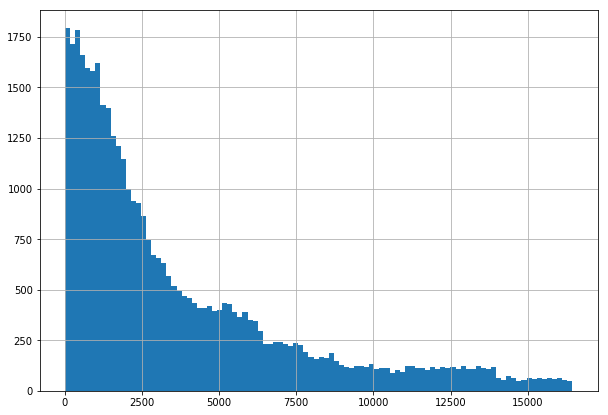

In [50]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

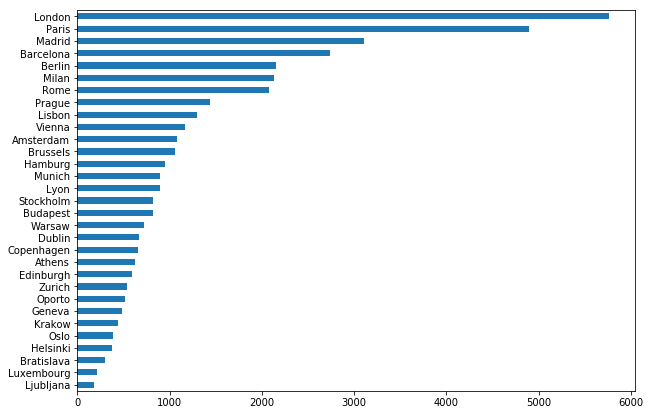

In [51]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

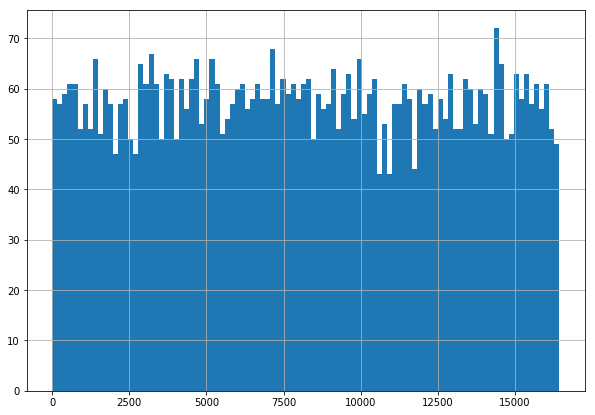

In [52]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

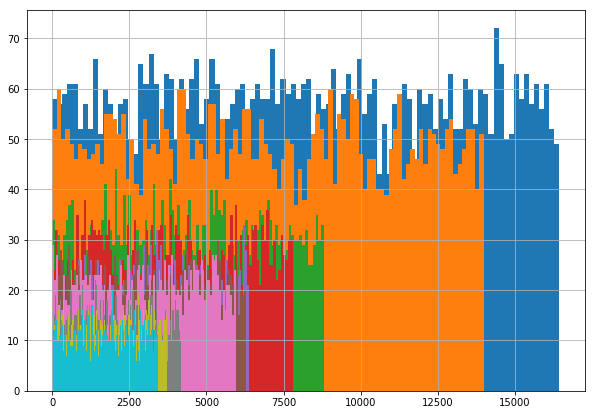

In [53]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

### Посмотрим распределение целевой переменной

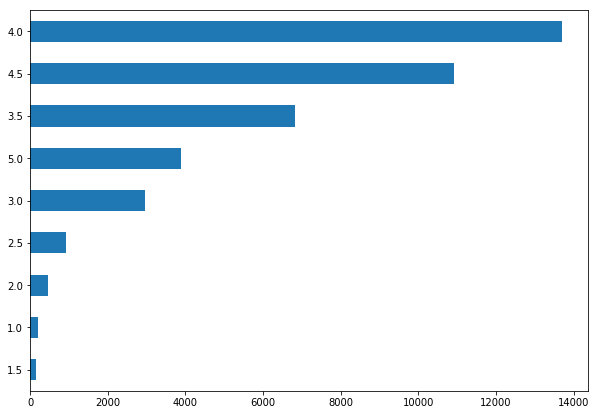

In [54]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

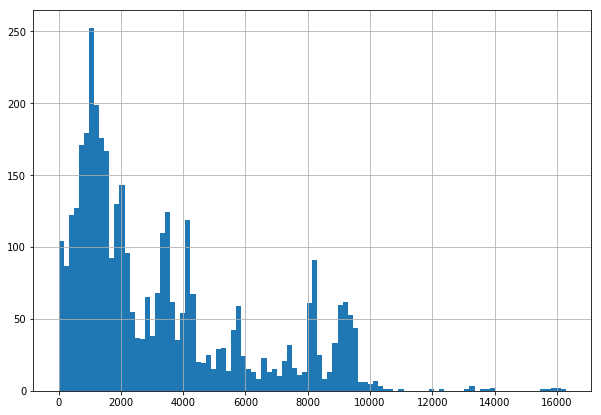

In [55]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

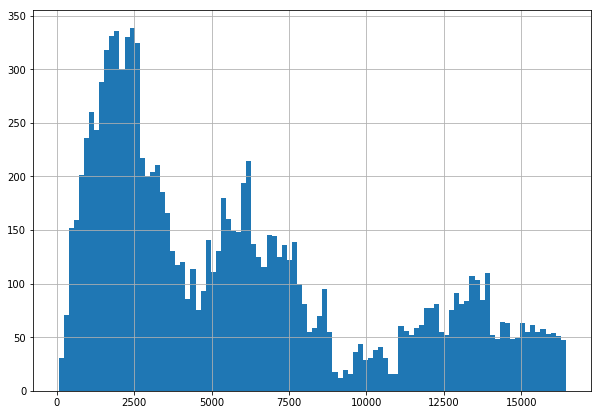

In [56]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### корреляция признаков

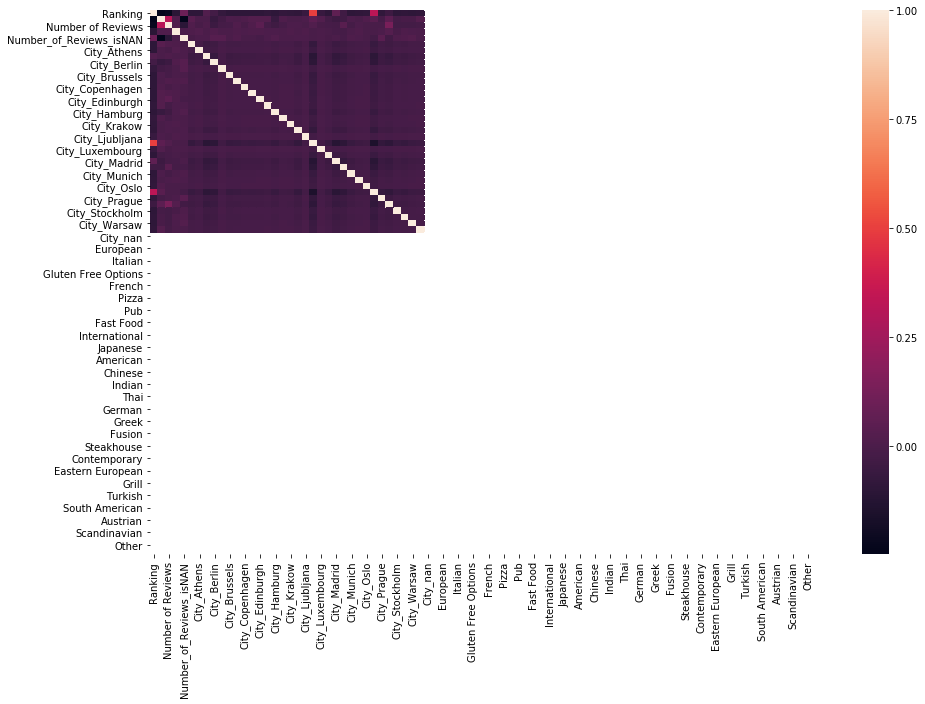

In [57]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [58]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [59]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [60]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 88), (40000, 88), (40000, 87), (32000, 87), (8000, 87))

# Model 
Сам ML

In [61]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [62]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [63]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [64]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21059499999999998


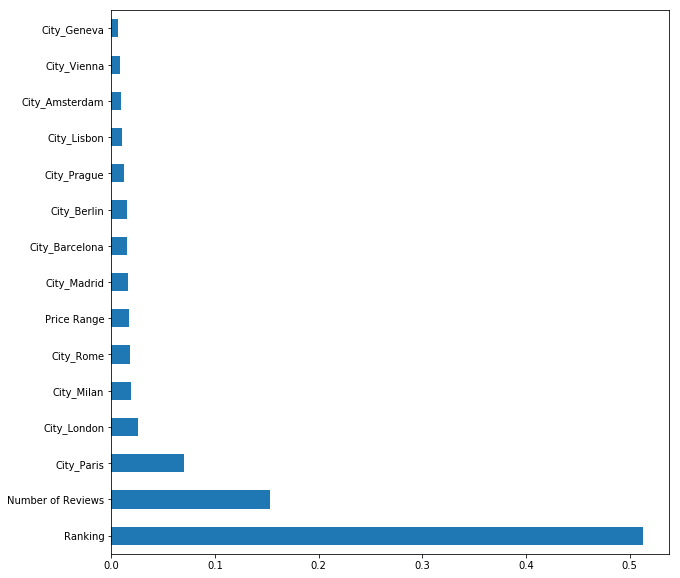

In [65]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [66]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other,dif_days
4501,2428.0,0.0,4.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3089,1179.0,2.0,11.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3551,10385.0,0.0,17.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6942,570.0,2.0,286.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8433,8886.0,0.0,6.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8389,5161.0,2.0,16.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4784,185.0,2.0,1698.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3727,13901.0,2.0,4.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9456,7742.0,0.0,29.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1467,2153.0,1.0,174.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
test_data = test_data.drop(['Rating'], axis=1)

In [68]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [69]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [70]:
predict_submission

array([3.155, 4.305, 4.485, ..., 3.   , 4.5  , 4.245])

In [71]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.155
1,id_1,4.305
2,id_2,4.485
3,id_3,4.210
4,id_4,4.480
5,id_5,4.645
6,id_6,2.430
7,id_7,2.945
8,id_8,4.135
9,id_9,4.745


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
